In [ ]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns 
import numpy as np

sns.set_style('darkgrid')

In [ ]:
#cargo la "base de datos" del ine: 
ine = 'https://candidaturas.ine.mx/documentos/descargas/baseDatosCandidatos.xls'

df = pd.read_excel(ine)

In [ ]:
#cambio los nombres de las columnas: 

names = list(df)
names[10] = 'DIRECCION' #direccion de la candidatura
names = [name.lower() for name in names]

#hago un diccionario para realizar un mapeo: 

mapa_nombres = {list(df)[i]:names[i] for i in range(len(names))}
mapa_nombres 

#remapo los nombres de las columnas: 

df = df.rename(columns= mapa_nombres)

In [ ]:
#hag una columna extra para sacar el num de distrito y normalizar: 
df['distrito_num'] = df["distrito"].str.strip().str.split('-', expand = True).iloc[:, 0]

In [ ]:
#también puedo dividir por representación proporcional (RP) y representación de mayoría relativa (MR) para intentar normalizar otro poquito la BD:

df['candidatura_tipo'] = df['candidatura'].str.strip().str.split(expand = True).iloc[:,2]

In [ ]:
#saco solo los candidatos titulares (en este DF dejamos fuera a los suplentes)
df_propietarios = df[(df['tipo_candidato'] == 'PROPIETARIO')].reset_index(drop = True)

In [ ]:
display(df_propietarios.head(3))

,partido_coalicion,candidatura,entidad,distrito,circunscripcion,num_lista_o_formula,nombre_candidato,tipo_candidato,edad,genero,direccion,telefono,correo_electronico,pagina_web,redes,escolaridad,estatus_escolaridad,cursos,historia_profesional,trayectoria_politica,motivo_cargo_publico,propuesta_1,propuesta_2,propuesta_genero,distrito_num,candidatura_tipo
0,PARTIDO DEL TRABAJO,DIPUTACIÓN FEDERAL MR,AGUASCALIENTES,1-JESUS MARIA,2,4747,JUAN MANUEL DE LOERA MARQUEZ,PROPIETARIO,59,HOMBRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,MR
1,PARTIDO VERDE ECOLOGISTA DE MÉXICO,DIPUTACIÓN FEDERAL MR,AGUASCALIENTES,1-JESUS MARIA,2,3323,CLAUDIA BRISEIDA CHAVEZ RAMIREZ,PROPIETARIO,28,MUJER,"Eduardo J. Correa, Ext. 116, Col. Centro, C. P...",4.499768e+09,ecocandidatodto1federal@gmail.com,NaN,https://www.facebook.com/ClaudiaRamirezVerde/,Educación media superior,Concluida,NaN,ASOCIACION DE PERSONAS DE LA TERCERA EDAD (201...,Como participación social trabaje en la Asocia...,Para poder ayudar a la ciudadanía en todos los...,Ayudar a las mujeres violentadas creando insti...,Garantizar medicamentos gratuitos y de calidad...,Ayudar a las mujeres creando instituciones don...,1,MR
2,MOVIMIENTO CIUDADANO,DIPUTACIÓN FEDERAL MR,AGUASCALIENTES,1-JESUS MARIA,2,5182,NORMA ISABEL ZAMORA RODRIGUEZ,PROPIETARIO,40,MUJER,"Filomeno Mata, Ext. 4, Col. 5 de mayo, PABELLO...",NaN,NaN,NaN,https://www.facebook.com/Norma-Zamora-18829015...,Licenciatura,Titulado(a),Lic. Ciencias políticas y Administración Públi...,Analista en el Ayuntamiento Aguascalientes de ...,Ponente e diversos Foros sobre Paridad de Géne...,Quiero ocupar un cargo público como Diputada F...,Proponer una estrategia con perspectiva de gén...,Que los refugios sigan funcionando con la supe...,Continuar de manera contundente visibilizando ...,1,MR


candidatos actualmente registrados por tipo de candidatura: representación proporcional (RP) y representación de mayoría relativa (MR)

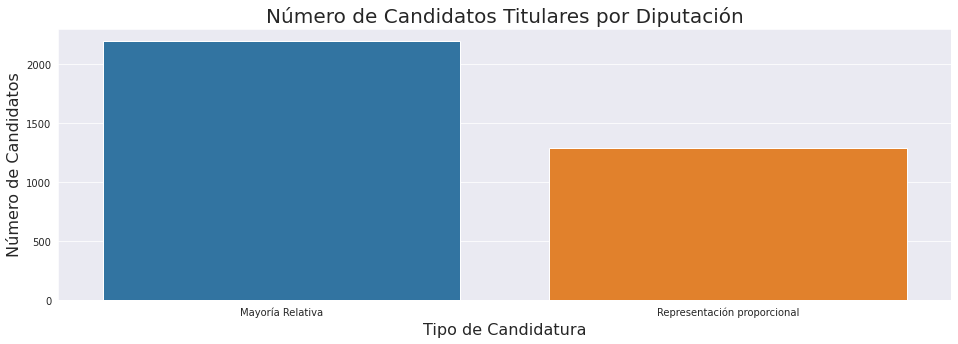

In [ ]:
#cuento el número de candidatos titulares en cada tipo de candidatura: 

x = df_propietarios.groupby(['candidatura_tipo'])['candidatura_tipo'].agg('count')

plt.figure(figsize=(16,5))

sns.barplot(x = ['Mayoría Relativa', 'Representación proporcional'], y = x)

plt.title('Número de Candidatos Titulares por Diputación', fontsize = 20)

plt.xlabel('Tipo de Candidatura', fontsize = 16)
plt.ylabel('Número de Candidatos', fontsize = 16)

plt.show()

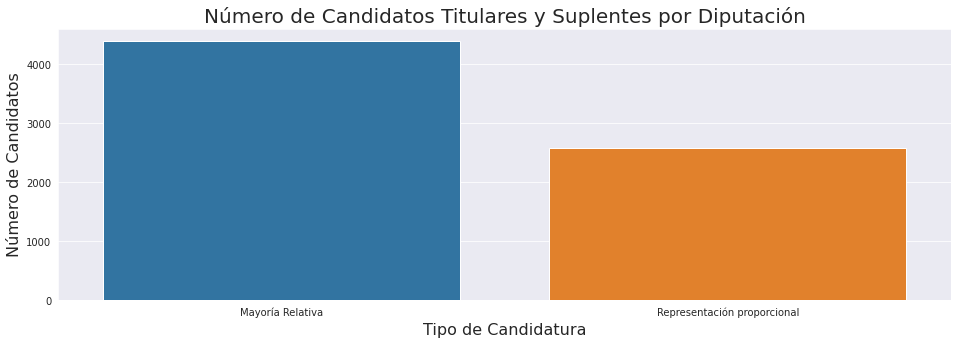

In [ ]:
x = df.groupby(['candidatura_tipo'])['candidatura_tipo'].agg('count')

plt.figure(figsize=(16,5))

sns.barplot(x = ['Mayoría Relativa', 'Representación proporcional'], y = x)

plt.title('Número de Candidatos Titulares y Suplentes por Diputación', fontsize = 20)

plt.xlabel('Tipo de Candidatura', fontsize = 16)
plt.ylabel('Número de Candidatos', fontsize = 16)

plt.show()

In [ ]:
d_22 = df_propietarios[(df_propietarios['entidad'] == 'CIUDAD DE MÉXICO') & (df_propietarios['distrito_num'] == '22')]#.to_csv('dist_22_CDMX.csv')

In [ ]:
d_22